In [1]:
import numpy as np
from cv2 import imread
import matplotlib.pyplot as plt

from modules.convolve_2d import convolve_2d
from modules.max_pool import max_pool_not_greedy

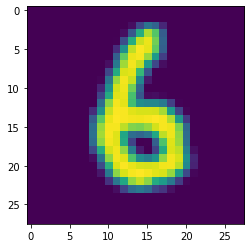

In [2]:
img = np.mean(imread('wip_gitignored/a.png'), axis=2) / 255
plt.imshow(img)

In [3]:
img = np.reshape(img, (1, *img.shape))

stride = 1

W = [np.random.randn(3, 3) for i in range(2)]

In [4]:
aaa = [img]
for i in range(2):
    for j in range(4):
        aaa.append(convolve_2d(aaa[-1], W, stride))
        print(aaa[-1].shape)
    aaa.append(np.stack([max_pool_not_greedy(array.squeeze()) for array in np.split(aaa[-1], len(aaa[-1]), axis=0)]))
    print(aaa[-1].shape)

(2, 26, 26)
(4, 24, 24)
(8, 22, 22)
(16, 20, 20)
(16, 10, 10)
(32, 8, 8)
(64, 6, 6)
(128, 4, 4)
(256, 2, 2)
(256, 1, 1)


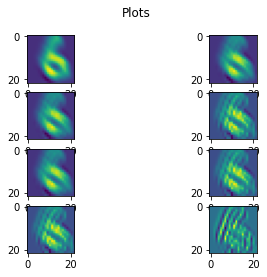

In [5]:
fig, plots = plt.subplots(4, 2)
fig.suptitle('Plots')
for index, array in enumerate(np.split(aaa[3], len(aaa[3]), axis=0)):
    plots[index // 2, index % 2].imshow(np.squeeze(array))
